In [1]:
# ================================================================
# [Colab] 한글 폰트 설정을 위한 최종 코드 (이 셀 하나만 실행 후, 런타임 재시작)
# ================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 나눔 폰트를 설치합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 재시작
# [중요!] 이 셀을 실행한 후에, Colab 메뉴에서 [런타임] -> [세션 다시 시작]을 반드시 실행해야 합니다.
#    수동으로 재시작하는 것이 가장 확실합니다.
print("✅ 폰트 설치 및 캐시 삭제가 완료되었습니다.")
print("✅ [중요] Colab 메뉴에서 [런타임] -> [세션 다시 시작]을 실행해주세요!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and direc

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] =False  # -1일때도 한글 안 깨짐

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [5]:
start_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/start.content.csv', parse_dates=['client_event_time'])
subscribe_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.subscription.csv', parse_dates=['client_event_time'])
info_id_df= pd.read_excel('/content/drive/MyDrive/codeit/Colab Notebooks/project2/content_id_map.xlsx')


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ 0-1단계: 전체 콘텐츠의 '첫 등장일'을 계산하여 기준 데이터를 생성합니다...")

# 'content.id'로 그룹화하여, 각 그룹별 'client_event_time'의 최솟값(가장 오래된 시간)을 찾습니다.
first_seen_series = start_content_df.groupby('content.id')['client_event_time'].min()
first_seen_series.name = 'first_seen_time'

print(f"  - 총 {len(first_seen_series)}개 콘텐츠의 첫 등장일을 계산했습니다.")

✅ 0-1단계: 전체 콘텐츠의 '첫 등장일'을 계산하여 기준 데이터를 생성합니다...
  - 총 151개 콘텐츠의 첫 등장일을 계산했습니다.


In [7]:
info_id_df.head()

,topic.name,total_execution_count,content.id,event_count,lesson_count,studying_time(day),category 1,category2,category3,stream,note,prictice,quiz,review,review_point
0,프로그래밍 시작하기 in Python,24986.0,f4be1a0fe0e301b03115591777fddf29,25051,15.0,4.0,코딩기초,프로그래밍 언어,NaN,10.0,0.0,4.0,1.0,22768.0,99.0
1,프로그래밍 오버뷰,15187.0,61b6463287573f00de13a930805a52d6,15234,18.0,3.0,코딩기초,생성형 AI 활용,IT실무/ 비즈니스,15.0,1.0,0.0,2.0,5924.0,99.0
2,프로그래밍 핵심 개념 in Python,6600.0,f491517f4737a60d661cd1fcacc702c0,5617,46.0,4.0,코딩기초,프로그래밍 언어,NaN,21.0,6.0,15.0,4.0,10036.0,98.0
3,프로그래밍 시작하기 in JavaScript,5557.0,68a3658f1b936bfff3bd6960cd561b0a,5571,19.0,4.0,코딩기초,프로그래밍 언어,NaN,10.0,2.0,6.0,1.0,5692.0,98.0
4,웹 퍼블리싱 시작하기,4692.0,445fac33232adcb3d1cdab7d8a579430,4717,52.0,6.0,웹 개발,NaN,NaN,24.0,10.0,15.0,3.0,2579.0,99.0


In [8]:
import pandas as pd

# [가정] id_info_df 데이터프레이임이 메모리에 로드된 상태

print("--- 수정 전 컬럼 목록 ---")
print(info_id_df.columns)

# [핵심] .rename() 메소드를 사용하여 'prictice'를 'practice'로 변경합니다.
# inplace=True 옵션은, 새로운 데이터프레이임을 만들지 않고 원본(id_info_df)을 직접 수정하라는 의미입니다.
info_id_df.rename(columns={'prictice': 'practice'}, inplace=True)

print("\n--- 수정 후 컬럼 목록 ---")
print(info_id_df.columns)

print("\n✅ 성공! 'prictice' 컬럼의 오타가 'practice'로 성공적으로 수정되었습니다.")

--- 수정 전 컬럼 목록 ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'prictice', 'quiz', 'review',
       'review_point'],
      dtype='object')

--- 수정 후 컬럼 목록 ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'practice', 'quiz', 'review',
       'review_point'],
      dtype='object')

✅ 성공! 'prictice' 컬럼의 오타가 'practice'로 성공적으로 수정되었습니다.


In [9]:
import pandas as pd

difficulty_info = start_content_df[['content.id', 'content.difficulty']].drop_duplicates()

id_info_df = pd.merge(info_id_df, difficulty_info, on='content.id', how='left')


In [10]:
resubscribe_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/resubscribe.subscription.csv', parse_dates=['client_event_time'])

In [11]:
renew_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/renew.subscription.csv', parse_dates=['client_event_time'])

✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...
  - 충성 그룹 (재구독/갱신) 사용자 수: 7,748
  - 이탈 그룹 (비갱신/비재구독) 사용자 수: 8,399

✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...

✅ 3단계: 두 그룹의 차이를 검증하고 시각화합니다...

--- Mann-Whitney U 검정 결과 ---
p-value: 0.00000
   결론: 두 그룹 간의 '신규 콘텐츠 시청 비율'에는 통계적으로 유의미한 차이가 있습니다.


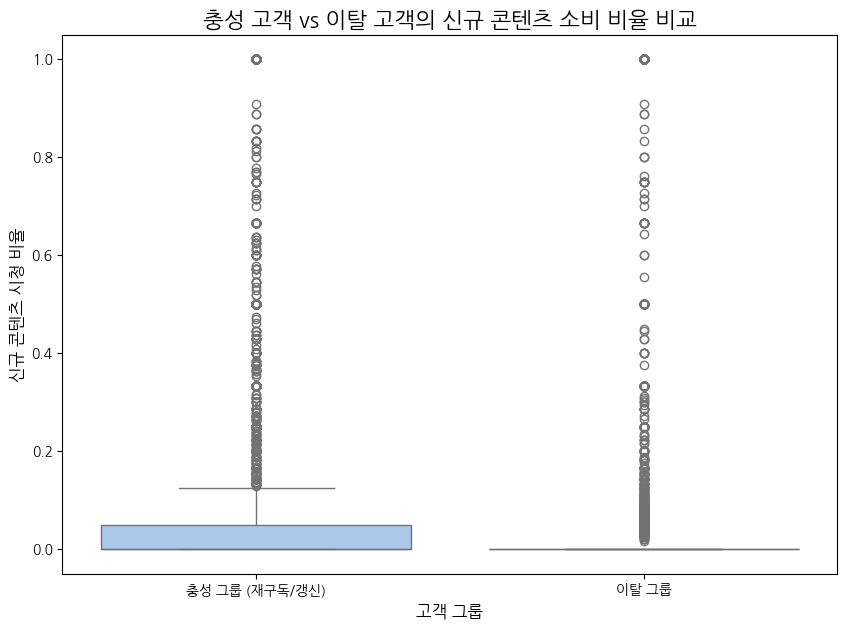


✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...

--- [충성 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기                288
프로그래밍 오버뷰                207
프로그래밍 시작하기 in Python     129
프로그래밍 핵심 개념 in Python    119
웹 자동화                    119
Name: count, dtype: int64

--- [충성 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        2928
프로그래밍 오버뷰                   2459
프로그래밍 핵심 개념 in Python       2131
프로그래밍과 데이터 in Python        1666
프로그래밍 시작하기 in JavaScript    1502
Name: count, dtype: int64

--- [이탈 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기            205
웹 자동화                 86
데이터베이스 모델링            55
Django 유저 기능 구현하기     49
프로그래밍 오버뷰             41
Name: count, dtype: int64

--- [이탈 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        3646
프로그래밍 오버뷰                   3072
프로그래밍 핵심 개념 in Python       2096
프로그래밍과 데이터 in Python        1631
프로그래밍 시작하기 in JavaScript    1468
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. start_content_df: 모든 유료/무료 유저의 콘텐츠 시청 기록
# 2. subscribe_df, renew_df, resubscribe_df: 구독, 갱신, 재구독 로그
# 3. first_seen_series: 각 콘텐츠의 '첫 등장일' 정보
# 4. id_info_df: content.id와 topic.name 등 강의 정보

# -------------------- 1단계: '충성 그룹'과 '이탈 그룹' 정의 --------------------
print("✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...")

# 충성 그룹: 갱신 또는 재구독을 한 모든 유저
retention_users = set(renew_df['user_id'].unique()).union(set(resubscribe_df['user_id'].unique()))

# 전체 유료 고객: 구독, 갱신, 재구독 중 하나라도 한 모든 유저
all_paid_users = set(subscribe_df['user_id'].unique()).union(retention_users)

# 이탈 그룹: 전체 유료 고객 중, 충성 그룹에 속하지 않은 유저
churn_users = all_paid_users - retention_users

print(f"  - 충성 그룹 (재구독/갱신) 사용자 수: {len(retention_users):,}")
print(f"  - 이탈 그룹 (비갱신/비재구독) 사용자 수: {len(churn_users):,}")


# -------------------- 2단계: 각 그룹의 '신규 콘텐츠 선호도' 계산 --------------------
print("\n✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...")

# 2-1. 시청 기록에 '신규성' 정보 추가
watch_log = start_content_df.copy()
watch_log_with_launch = pd.merge(watch_log, first_seen_series, on='content.id', how='left')
watch_log_with_launch['days_since_launch'] = (watch_log_with_launch['client_event_time'] - watch_log_with_launch['first_seen_time']).dt.days
watch_log_with_launch['is_new'] = watch_log_with_launch['days_since_launch'] <= 30

# 2-2. 각 유저의 전체 시청 수와 신규 시청 수를 계산
total_views = watch_log_with_launch.groupby('user_id').size().rename('total_views')
new_views = watch_log_with_launch[watch_log_with_launch['is_new'] == True].groupby('user_id').size().rename('new_views')

# 2-3. 데이터를 하나로 합치고, 비율 계산
analysis_df = pd.concat([total_views, new_views], axis=1).fillna(0)
analysis_df['new_content_ratio'] = (analysis_df['new_views'] / analysis_df['total_views']).fillna(0)

# 2-4. 각 유저에게 그룹 라벨 부여
analysis_df['group'] = np.nan
analysis_df.loc[analysis_df.index.isin(retention_users), 'group'] = '충성 그룹 (재구독/갱신)'
analysis_df.loc[analysis_df.index.isin(churn_users), 'group'] = '이탈 그룹'
analysis_df.dropna(subset=['group'], inplace=True) # 두 그룹에 속하지 않는 유저는 제외


# -------------------- 3단계: 통계적 검증 및 시각화 --------------------
print("\n✅ 3단계: 두 그룹의 차이를 검증하고 시각화합니다...")

# 그룹 나누기
group_retention = analysis_df[analysis_df['group'] == '충성 그룹 (재구독/갱신)']['new_content_ratio']
group_churn = analysis_df[analysis_df['group'] == '이탈 그룹']['new_content_ratio']

# Mann-Whitney U 검정
stat, p_value = mannwhitneyu(group_retention, group_churn, alternative='two-sided')

print(f"\n--- Mann-Whitney U 검정 결과 ---")
print(f"p-value: {p_value:.5f}")
if p_value < 0.05:
    print("   결론: 두 그룹 간의 '신규 콘텐츠 시청 비율'에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("   결론: 두 그룹 간의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# Boxplot 시각화
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_df, x='group', y='new_content_ratio', palette='pastel')
plt.title('충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율 비교', fontsize=16)
plt.xlabel('고객 그룹', fontsize=12)
plt.ylabel('신규 콘텐츠 시청 비율', fontsize=12)
plt.show()


# -------------------- 4단계: 각 그룹이 '사랑한' 콘텐츠 목록 추출 --------------------
print("\n✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...")

# content.id를 topic.name으로 바꾸기 위한 매핑 준비
id_to_name_map = id_info_df.set_index('content.id')['topic.name'].to_dict()

def get_top_contents(user_set, watch_log, log_type):
    """특정 그룹이 많이 본 콘텐츠 Top 5를 반환하는 함수"""
    group_logs = watch_log[watch_log['user_id'].isin(user_set)]
    top_5 = group_logs['content.id'].value_counts().nlargest(5)
    top_5.index = top_5.index.map(id_to_name_map) # 인덱스를 강의 이름으로 변경
    print(f"\n--- [{log_type}] 그룹이 가장 많이 본 콘텐츠 Top 5 ---")
    print(top_5)

# 충성 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "충성 (신규 콘텐츠)")
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "충성 (기존 콘텐츠)")

# 이탈 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "이탈 (신규 콘텐츠)")
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "이탈 (기존 콘텐츠)")

✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...
  - 충성 그룹 (재구독/갱신) 사용자 수: 7,748
  - 이탈 그룹 (비갱신/비재구독) 사용자 수: 8,399

✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...

✅ 4단계: 두 그룹의 차이를 통계 요약 및 시각화로 명확하게 보여줍니다...


  [최종 분석 결과] 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율

--- 그룹별 통계 요약 ---
                    평균  중앙값    표준편차
group                              
이탈 그룹           0.0544  0.0  0.1909
충성 그룹 (재구독/갱신)  0.0996  0.0  0.2379

--- Mann-Whitney U 검정 결과 ---
U-통계량: 18751096.00
p-value: 0.00000
   -> 결론: 두 그룹 간의 신규 콘텐츠 시청 비율에는 '통계적으로 유의미한' 차이가 있습니다.


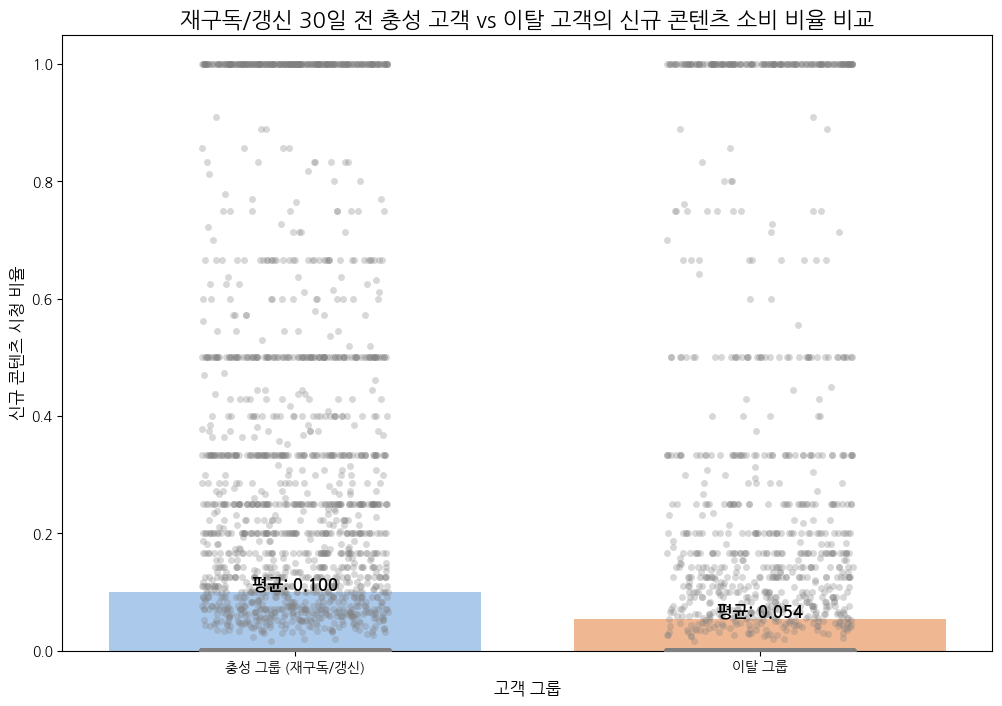


✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...

--- [충성 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기                288
프로그래밍 오버뷰                207
프로그래밍 시작하기 in Python     129
프로그래밍 핵심 개념 in Python    119
웹 자동화                    119
Name: count, dtype: int64

--- [충성 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        2928
프로그래밍 오버뷰                   2459
프로그래밍 핵심 개념 in Python       2131
프로그래밍과 데이터 in Python        1666
프로그래밍 시작하기 in JavaScript    1502
Name: count, dtype: int64

--- [이탈 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기            205
웹 자동화                 86
데이터베이스 모델링            55
Django 유저 기능 구현하기     49
프로그래밍 오버뷰             41
Name: count, dtype: int64

--- [이탈 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        3646
프로그래밍 오버뷰                   3072
프로그래밍 핵심 개념 in Python       2096
프로그래밍과 데이터 in Python        1631
프로그래밍 시작하기 in JavaScript    1468
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. start_content_df: 모든 유료/무료 유저의 콘텐츠 시청 기록
# 2. subscribe_df, renew_df, resubscribe_df: 구독, 갱신, 재구독 로그
# 3. first_seen_series: 각 콘텐츠의 '첫 등장일' 정보
# 4. id_info_df: content.id와 topic.name 등 강의 정보

# -------------------- 1단계: '충성 그룹'과 '이탈 그룹' 정의 --------------------
print("✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...")

# 충성 그룹: 갱신 또는 재구독을 한 모든 유저
retention_users = set(renew_df['user_id'].unique()).union(set(resubscribe_df['user_id'].unique()))

# 전체 유료 고객: 구독, 갱신, 재구독 중 하나라도 한 모든 유저
all_paid_users = set(subscribe_df['user_id'].unique()).union(retention_users)

# 이탈 그룹: 전체 유료 고객 중, 충성 그룹에 속하지 않은 유저
churn_users = all_paid_users - retention_users

print(f"  - 충성 그룹 (재구독/갱신) 사용자 수: {len(retention_users):,}")
print(f"  - 이탈 그룹 (비갱신/비재구독) 사용자 수: {len(churn_users):,}")


# -------------------- 2단계: 각 그룹의 '신규 콘텐츠 선호도' 계산 --------------------
print("\n✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...")

# 2-1. 시청 기록에 '신규성' 정보 추가
watch_log = start_content_df.copy()
watch_log_with_launch = pd.merge(watch_log, first_seen_series, on='content.id', how='left')
watch_log_with_launch['days_since_launch'] = (watch_log_with_launch['client_event_time'] - watch_log_with_launch['first_seen_time']).dt.days
watch_log_with_launch['is_new'] = watch_log_with_launch['days_since_launch'] <= 30

# 2-2. 각 유저의 전체 시청 수와 신규 시청 수를 계산
total_views = watch_log_with_launch.groupby('user_id').size().rename('total_views')
new_views = watch_log_with_launch[watch_log_with_launch['is_new'] == True].groupby('user_id').size().rename('new_views')

# 2-3. 데이터를 하나로 합치고, 비율 계산
analysis_df = pd.concat([total_views, new_views], axis=1).fillna(0)
analysis_df['new_content_ratio'] = (analysis_df['new_views'] / analysis_df['total_views']).fillna(0)

# 2-4. 각 유저에게 그룹 라벨 부여
analysis_df['group'] = np.nan
analysis_df.loc[analysis_df.index.isin(retention_users), 'group'] = '충성 그룹 (재구독/갱신)'
analysis_df.loc[analysis_df.index.isin(churn_users), 'group'] = '이탈 그룹'
analysis_df.dropna(subset=['group'], inplace=True) # 두 그룹에 속하지 않는 유저는 제외


# -------------------- [수정] 3단계: 통계 요약 및 더 명확한 시각화 --------------------
print("\n✅ 4단계: 두 그룹의 차이를 통계 요약 및 시각화로 명확하게 보여줍니다...")

# --- 1. 통계 요약 테이블 생성 ---
# 각 그룹의 평균, 중앙값, 표준편차를 계산합니다.
summary_stats = analysis_df.groupby('group')['new_content_ratio'].describe()

# Mann-Whitney U 검정 수행
group_retention = analysis_df[analysis_df['group'] == '충성 그룹 (재구독/갱신)']['new_content_ratio']
group_churn = analysis_df[analysis_df['group'] == '이탈 그룹']['new_content_ratio']
stat, p_value = mannwhitneyu(group_retention, group_churn, alternative='two-sided')

print("\n\n==========================================================")
print("  [최종 분석 결과] 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율")
print("==========================================================")
print("\n--- 그룹별 통계 요약 ---")
print(summary_stats[['mean', '50%', 'std']].rename(columns={'mean':'평균', '50%':'중앙값', 'std':'표준편차'}).round(4))
print("\n--- Mann-Whitney U 검정 결과 ---")
print(f"U-통계량: {stat:.2f}")
print(f"p-value: {p_value:.5f}")
if p_value < 0.05:
    print("   -> 결론: 두 그룹 간의 신규 콘텐츠 시청 비율에는 '통계적으로 유의미한' 차이가 있습니다.")
else:
    print("   -> 결론: 두 그룹 간의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")



# --- 2. 더 이해하기 쉬운 시각화: Bar Plot + Stripplot (수정 완료) ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=analysis_df, x='group', y='new_content_ratio', palette='pastel', errorbar=None)
sns.stripplot(data=analysis_df, x='group', y='new_content_ratio', color='grey', alpha=0.3, jitter=0.2)

# [핵심 수정] 막대의 순서가 아닌, '이름'을 기준으로 정확한 평균값을 찾아 표시합니다.
# 1. 평균값을 미리 계산해 둡니다.
means = analysis_df.groupby('group')['new_content_ratio'].mean()
# 2. X축 라벨(그룹 이름)의 순서를 가져옵니다.
group_order = [tick.get_text() for tick in ax.get_xticklabels()]

# 3. 각 막대에 대해, 해당 막대의 그룹 이름에 맞는 평균값을 표시합니다.
for i, bar in enumerate(ax.patches):
    group_name = group_order[i] # 현재 막대의 그룹 이름
    mean_value = means[group_name] # 그 이름에 해당하는 평균값
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'평균: {mean_value:.3f}', # 정확한 평균값 표시
            ha='center', va='bottom', fontsize=12, weight='bold')

plt.title('재구독/갱신 30일 전 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율 비교', fontsize=16)
plt.xlabel('고객 그룹', fontsize=12)
plt.ylabel('신규 콘텐츠 시청 비율', fontsize=12)
plt.show()



# -------------------- 4단계: 각 그룹이 '사랑한' 콘텐츠 목록 추출 --------------------
print("\n✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...")

# content.id를 topic.name으로 바꾸기 위한 매핑 준비
id_to_name_map = id_info_df.set_index('content.id')['topic.name'].to_dict()

def get_top_contents(user_set, watch_log, log_type):
    """특정 그룹이 많이 본 콘텐츠 Top 5를 반환하는 함수"""
    group_logs = watch_log[watch_log['user_id'].isin(user_set)]
    top_5 = group_logs['content.id'].value_counts().nlargest(5)
    top_5.index = top_5.index.map(id_to_name_map) # 인덱스를 강의 이름으로 변경
    print(f"\n--- [{log_type}] 그룹이 가장 많이 본 콘텐츠 Top 5 ---")
    print(top_5)

# 충성 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "충성 (신규 콘텐츠)")
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "충성 (기존 콘텐츠)")

# 이탈 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "이탈 (신규 콘텐츠)")
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "이탈 (기존 콘텐츠)")

✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...
  - 충성 그룹 (재구독/갱신) 사용자 수: 7,748
  - 이탈 그룹 (비갱신/비재구독) 사용자 수: 8,399

✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...

✅ 4단계: 두 그룹의 차이를 통계 요약 및 시각화로 명확하게 보여줍니다...


  [최종 분석 결과] 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율

--- 그룹별 통계 요약 ---
                    평균  중앙값    표준편차
group                              
이탈 그룹           0.0353  0.0  0.1586
충성 그룹 (재구독/갱신)  0.0525  0.0  0.1758

--- Mann-Whitney U 검정 결과 ---
U-통계량: 17823373.50
p-value: 0.00000
   -> 결론: 두 그룹 간의 신규 콘텐츠 시청 비율에는 '통계적으로 유의미한' 차이가 있습니다.


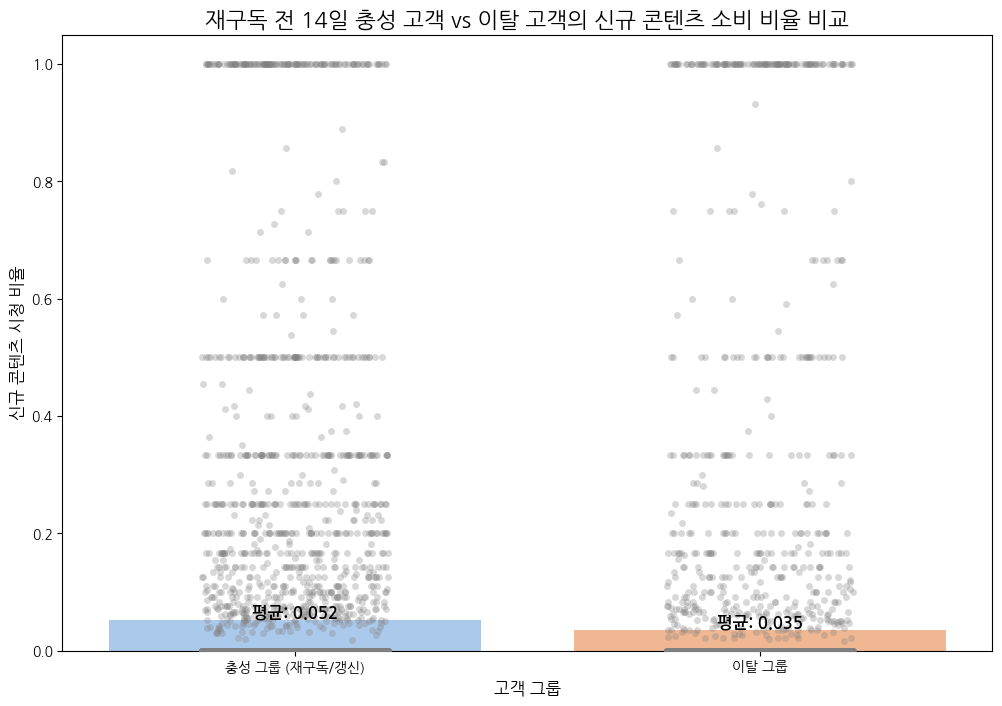


✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...

--- [충성 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기                246
프로그래밍 오버뷰                 99
프로그래밍 핵심 개념 in Python     68
프로그래밍 시작하기 in Python      54
웹 자동화                     53
Name: count, dtype: int64

--- [충성 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        3003
프로그래밍 오버뷰                   2567
프로그래밍 핵심 개념 in Python       2182
프로그래밍과 데이터 in Python        1705
프로그래밍 시작하기 in JavaScript    1550
Name: count, dtype: int64

--- [이탈 (신규 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
챗GPT 활용하기                175
웹 자동화                     34
프로그래밍 오버뷰                 30
프로그래밍 시작하기 in Python      24
프로그래밍 핵심 개념 in Python     23
Name: count, dtype: int64

--- [이탈 (기존 콘텐츠)] 그룹이 가장 많이 본 콘텐츠 Top 5 ---
content.id
프로그래밍 시작하기 in Python        3653
프로그래밍 오버뷰                   3083
프로그래밍 핵심 개념 in Python       2107
프로그래밍과 데이터 in Python        1636
프로그래밍 시작하기 in JavaScript    1480
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. start_content_df: 모든 유료/무료 유저의 콘텐츠 시청 기록
# 2. subscribe_df, renew_df, resubscribe_df: 구독, 갱신, 재구독 로그
# 3. first_seen_series: 각 콘텐츠의 '첫 등장일' 정보
# 4. id_info_df: content.id와 topic.name 등 강의 정보

# -------------------- 1단계: '충성 그룹'과 '이탈 그룹' 정의 --------------------
print("✅ 1단계: '충성 그룹'과 '이탈 그룹'을 정의합니다...")

# 충성 그룹: 갱신 또는 재구독을 한 모든 유저
retention_users = set(renew_df['user_id'].unique()).union(set(resubscribe_df['user_id'].unique()))

# 전체 유료 고객: 구독, 갱신, 재구독 중 하나라도 한 모든 유저
all_paid_users = set(subscribe_df['user_id'].unique()).union(retention_users)

# 이탈 그룹: 전체 유료 고객 중, 충성 그룹에 속하지 않은 유저
churn_users = all_paid_users - retention_users

print(f"  - 충성 그룹 (재구독/갱신) 사용자 수: {len(retention_users):,}")
print(f"  - 이탈 그룹 (비갱신/비재구독) 사용자 수: {len(churn_users):,}")


# -------------------- 2단계: 각 그룹의 '신규 콘텐츠 선호도' 계산 --------------------
print("\n✅ 2단계: 각 그룹의 '신규 콘텐츠 시청 비율'을 계산합니다...")

# 2-1. 시청 기록에 '신규성' 정보 추가
watch_log = start_content_df.copy()
watch_log_with_launch = pd.merge(watch_log, first_seen_series, on='content.id', how='left')
watch_log_with_launch['days_since_launch'] = (watch_log_with_launch['client_event_time'] - watch_log_with_launch['first_seen_time']).dt.days
watch_log_with_launch['is_new'] = watch_log_with_launch['days_since_launch'] <= 14

# 2-2. 각 유저의 전체 시청 수와 신규 시청 수를 계산
total_views = watch_log_with_launch.groupby('user_id').size().rename('total_views')
new_views = watch_log_with_launch[watch_log_with_launch['is_new'] == True].groupby('user_id').size().rename('new_views')

# 2-3. 데이터를 하나로 합치고, 비율 계산
analysis_df = pd.concat([total_views, new_views], axis=1).fillna(0)
analysis_df['new_content_ratio'] = (analysis_df['new_views'] / analysis_df['total_views']).fillna(0)

# 2-4. 각 유저에게 그룹 라벨 부여
analysis_df['group'] = np.nan
analysis_df.loc[analysis_df.index.isin(retention_users), 'group'] = '충성 그룹 (재구독/갱신)'
analysis_df.loc[analysis_df.index.isin(churn_users), 'group'] = '이탈 그룹'
analysis_df.dropna(subset=['group'], inplace=True) # 두 그룹에 속하지 않는 유저는 제외


# -------------------- [수정] 3단계: 통계 요약 및 더 명확한 시각화 --------------------
print("\n✅ 4단계: 두 그룹의 차이를 통계 요약 및 시각화로 명확하게 보여줍니다...")

# --- 1. 통계 요약 테이블 생성 ---
# 각 그룹의 평균, 중앙값, 표준편차를 계산합니다.
summary_stats = analysis_df.groupby('group')['new_content_ratio'].describe()

# Mann-Whitney U 검정 수행
group_retention = analysis_df[analysis_df['group'] == '충성 그룹 (재구독/갱신)']['new_content_ratio']
group_churn = analysis_df[analysis_df['group'] == '이탈 그룹']['new_content_ratio']
stat, p_value = mannwhitneyu(group_retention, group_churn, alternative='two-sided')

print("\n\n==========================================================")
print("  [최종 분석 결과] 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율")
print("==========================================================")
print("\n--- 그룹별 통계 요약 ---")
print(summary_stats[['mean', '50%', 'std']].rename(columns={'mean':'평균', '50%':'중앙값', 'std':'표준편차'}).round(4))
print("\n--- Mann-Whitney U 검정 결과 ---")
print(f"U-통계량: {stat:.2f}")
print(f"p-value: {p_value:.5f}")
if p_value < 0.05:
    print("   -> 결론: 두 그룹 간의 신규 콘텐츠 시청 비율에는 '통계적으로 유의미한' 차이가 있습니다.")
else:
    print("   -> 결론: 두 그룹 간의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")



# --- 2. 더 이해하기 쉬운 시각화: Bar Plot + Stripplot (수정 완료) ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=analysis_df, x='group', y='new_content_ratio', palette='pastel', errorbar=None)
sns.stripplot(data=analysis_df, x='group', y='new_content_ratio', color='grey', alpha=0.3, jitter=0.2)

# [핵심 수정] 막대의 순서가 아닌, '이름'을 기준으로 정확한 평균값을 찾아 표시합니다.
# 1. 평균값을 미리 계산해 둡니다.
means = analysis_df.groupby('group')['new_content_ratio'].mean()
# 2. X축 라벨(그룹 이름)의 순서를 가져옵니다.
group_order = [tick.get_text() for tick in ax.get_xticklabels()]

# 3. 각 막대에 대해, 해당 막대의 그룹 이름에 맞는 평균값을 표시합니다.
for i, bar in enumerate(ax.patches):
    group_name = group_order[i] # 현재 막대의 그룹 이름
    mean_value = means[group_name] # 그 이름에 해당하는 평균값
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'평균: {mean_value:.3f}', # 정확한 평균값 표시
            ha='center', va='bottom', fontsize=12, weight='bold')

plt.title('재구독 전 14일 충성 고객 vs 이탈 고객의 신규 콘텐츠 소비 비율 비교', fontsize=16)
plt.xlabel('고객 그룹', fontsize=12)
plt.ylabel('신규 콘텐츠 시청 비율', fontsize=12)
plt.show()



# -------------------- 4단계: 각 그룹이 '사랑한' 콘텐츠 목록 추출 --------------------
print("\n✅ 4단계: 각 그룹이 가장 많이 소비한 콘텐츠 Top 5를 추출합니다...")

# content.id를 topic.name으로 바꾸기 위한 매핑 준비
id_to_name_map = id_info_df.set_index('content.id')['topic.name'].to_dict()

def get_top_contents(user_set, watch_log, log_type):
    """특정 그룹이 많이 본 콘텐츠 Top 5를 반환하는 함수"""
    group_logs = watch_log[watch_log['user_id'].isin(user_set)]
    top_5 = group_logs['content.id'].value_counts().nlargest(5)
    top_5.index = top_5.index.map(id_to_name_map) # 인덱스를 강의 이름으로 변경
    print(f"\n--- [{log_type}] 그룹이 가장 많이 본 콘텐츠 Top 5 ---")
    print(top_5)

# 충성 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "충성 (신규 콘텐츠)")
get_top_contents(retention_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "충성 (기존 콘텐츠)")

# 이탈 그룹이 많이 본 신규/기존 콘텐츠
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == True], "이탈 (신규 콘텐츠)")
get_top_contents(churn_users, watch_log_with_launch[watch_log_with_launch['is_new'] == False], "이탈 (기존 콘텐츠)")

In [15]:
content_end_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/end.content.csv', parse_dates=['client_event_time'])

✅ 1단계: 사용자별 콘텐츠 완주 여부 데이터를 생성합니다...
  - 총 124,649개의 '시작-완주' 기록을 생성했습니다.

✅ 2단계: 각 사용자별 '평균 완주율'을 계산합니다...

✅ 3단계: '충성 그룹'과 '이탈 그룹'의 평균 완주율을 비교하고 검증합니다...

--- Mann-Whitney U 검정 결과 (p-value): 0.01279 ---
U-통계량: 17226382.00
   결론: 두 그룹 간의 '평균 완주율'에는 통계적으로 유의미한 차이가 있습니다.


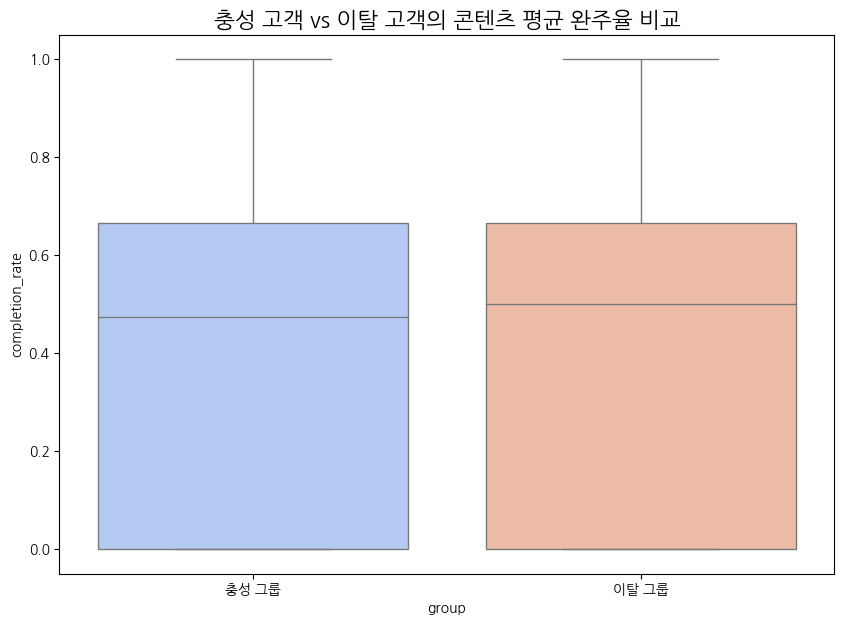


✅ 4단계: [심화] 난이도별 완주율의 차이를 분석합니다...

--- 난이도별, 그룹별 평균 완주율 (%) ---
group               이탈 그룹  충성 그룹
content.difficulty              
advanced            35.98  38.46
beginner            64.83  67.67
hard                35.52  36.38
intermediate        47.02  49.24


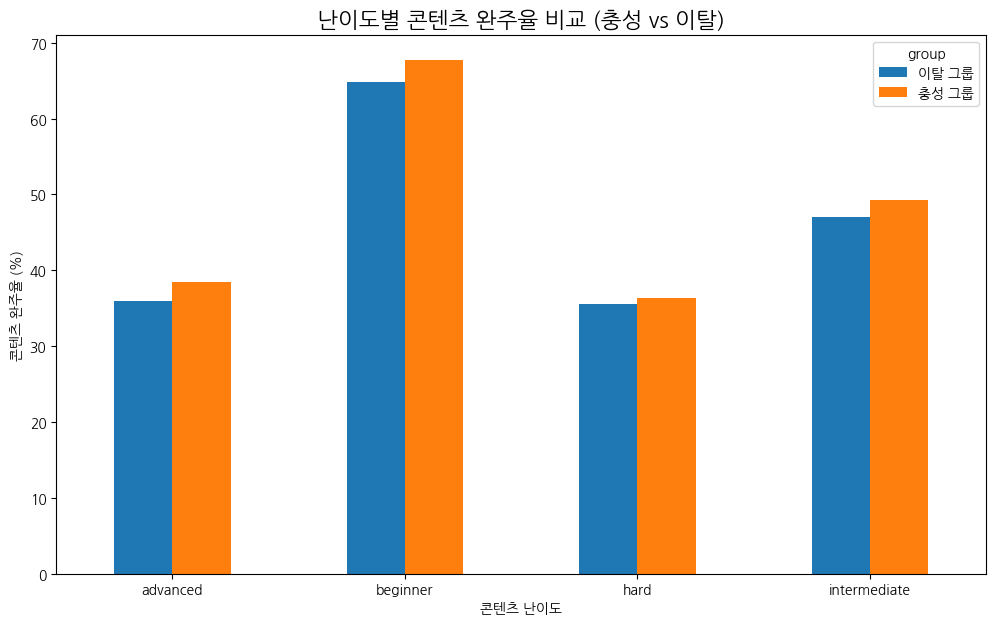

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. start_content_df, content_end_df: 콘텐츠 시작/종료 로그 ('user_id', 'content.id')
# 2. id_info_df: content.id별 'content.difficulty' 정보
# 3. retention_users, churn_users: 이전에 정의한 '충성'/'이탈' 그룹 user_id 목록 (set)

# -------------------- 1단계: 각 사용자의 '콘텐츠별 완주 여부' 데이터 생성 --------------------
print("✅ 1단계: 사용자별 콘텐츠 완주 여부 데이터를 생성합니다...")

# 시작한 기록과 끝낸 기록에 각각 표시를 달아줍니다.
start_logs = start_content_df[['user_id', 'content.id']].drop_duplicates()
start_logs['started'] = 1
end_logs = content_end_df[['user_id', 'content.id']].drop_duplicates()
end_logs['completed'] = 1

# 두 기록을 user_id와 content.id를 기준으로 합칩니다.
completion_status_df = pd.merge(start_logs, end_logs, on=['user_id', 'content.id'], how='left')
# 끝낸 기록이 없으면(NaN), 0으로 채워 완주 여부(1/0)를 명확히 합니다.
completion_status_df['completed'].fillna(0, inplace=True)

print(f"  - 총 {len(completion_status_df):,}개의 '시작-완주' 기록을 생성했습니다.")


# -------------------- 2단계: 사용자별 '평균 완주율' 계산 --------------------
print("\n✅ 2단계: 각 사용자별 '평균 완주율'을 계산합니다...")

# user_id로 그룹화하여, 각 사용자가 시작한 총 콘텐츠 수와, 그중 완주한 콘텐츠 수를 셉니다.
user_completion_rate = completion_status_df.groupby('user_id').agg(
    total_started=('started', 'sum'),
    total_completed=('completed', 'sum')
)
# 평균 완주율 계산
user_completion_rate['completion_rate'] = (user_completion_rate['total_completed'] / user_completion_rate['total_started']).fillna(0)


# -------------------- 3단계: '충성/이탈' 그룹별 완주율 비교 및 검증 --------------------
print("\n✅ 3단계: '충성 그룹'과 '이탈 그룹'의 평균 완주율을 비교하고 검증합니다...")

# 각 유저에게 그룹 라벨 부여
user_completion_rate['group'] = np.nan
user_completion_rate.loc[user_completion_rate.index.isin(retention_users), 'group'] = '충성 그룹'
user_completion_rate.loc[user_completion_rate.index.isin(churn_users), 'group'] = '이탈 그룹'
analysis_df = user_completion_rate.dropna(subset=['group'])

# 그룹 나누기
group_retention = analysis_df[analysis_df['group'] == '충성 그룹']['completion_rate']
group_churn = analysis_df[analysis_df['group'] == '이탈 그룹']['completion_rate']

# Mann-Whitney U 검정
stat, p_value = mannwhitneyu(group_retention, group_churn)
print(f"\n--- Mann-Whitney U 검정 결과 (p-value): {p_value:.5f} ---")
print(f"U-통계량: {stat:.2f}")
if p_value < 0.05:
    print("   결론: 두 그룹 간의 '평균 완주율'에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("   결론: 두 그룹 간의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# 시각화: Boxplot
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_df, x='group', y='completion_rate', palette='coolwarm')
plt.title('충성 고객 vs 이탈 고객의 콘텐츠 평균 완주율 비교', fontsize=16)
plt.show()


# -------------------- 4단계: [심화] 난이도별 완주율 비교 --------------------
print("\n✅ 4단계: [심화] 난이도별 완주율의 차이를 분석합니다...")

# 완주 여부 데이터에 난이도 정보 추가
completion_with_difficulty = pd.merge(completion_status_df, id_info_df[['content.id', 'content.difficulty']], on='content.id', how='left')
# 그룹 정보 추가
completion_with_difficulty['group'] = np.nan
completion_with_difficulty.loc[completion_with_difficulty['user_id'].isin(retention_users), 'group'] = '충성 그룹'
completion_with_difficulty.loc[completion_with_difficulty['user_id'].isin(churn_users), 'group'] = '이탈 그룹'
completion_with_difficulty.dropna(subset=['group', 'content.difficulty'], inplace=True)

# 난이도별, 그룹별 평균 완주율 계산
difficulty_completion_rate = completion_with_difficulty.groupby(['content.difficulty', 'group'])['completed'].mean().unstack() * 100

print("\n--- 난이도별, 그룹별 평균 완주율 (%) ---")
print(difficulty_completion_rate.round(2))

# 시각화: 그룹 막대그래프
difficulty_completion_rate.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('난이도별 콘텐츠 완주율 비교 (충성 vs 이탈)', fontsize=16)
plt.ylabel('콘텐츠 완주율 (%)')
plt.xlabel('콘텐츠 난이도')
plt.show()

✅ 1단계: 사용자별 콘텐츠 완주 여부 데이터를 생성합니다...
  - 총 124,649개의 '시작-완주' 기록을 생성했습니다.

✅ 2단계: 각 사용자별 '평균 완주율'을 계산합니다...

✅ 3단계: '충성 그룹'과 '이탈 그룹'의 평균 완주율을 비교하고 검증합니다...

--- Mann-Whitney U 검정 결과 (p-value): 0.01279 ---
U-통계량: 17226382.00
   결론: 두 그룹 간의 '평균 완주율'에는 통계적으로 유의미한 차이가 있습니다.


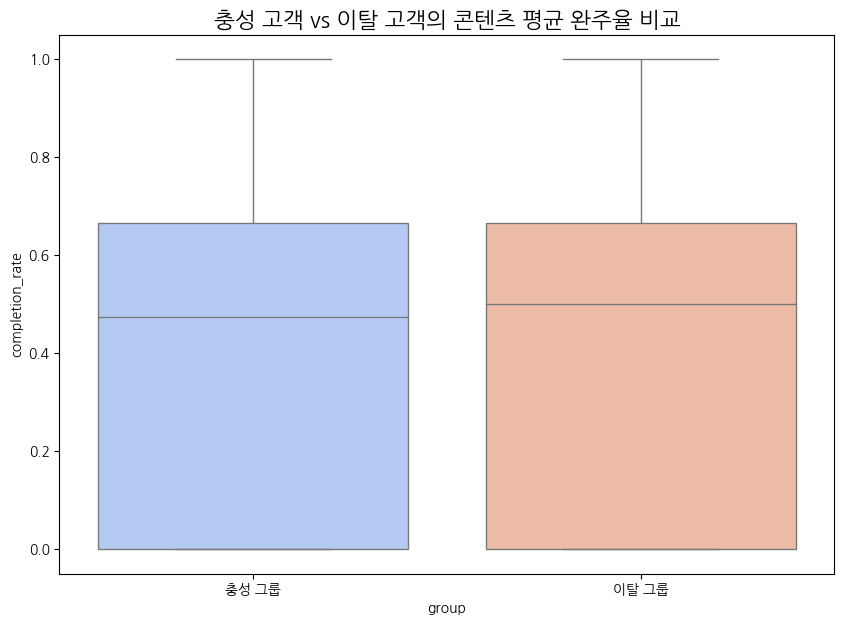


✅ 4단계: [심화] 난이도별 완주율의 차이를 분석하고 검증합니다...

--- 난이도별, 그룹별 평균 완주율 (%) (정렬 후) ---
group               이탈 그룹  충성 그룹
content.difficulty              
입문                  64.83  67.67
초급                  47.02  49.24
중급                  35.98  38.46
고급                  35.52  36.38


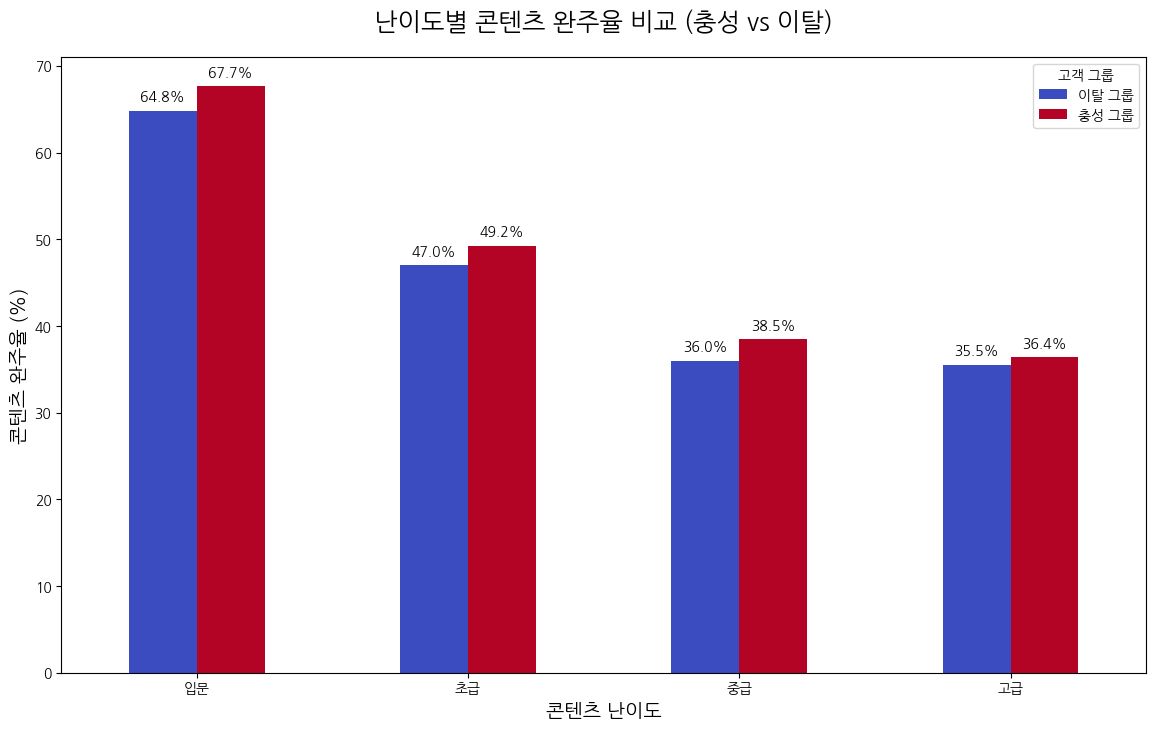


--- [통계 검증] 각 난이도별 완주율 차이의 p-value ---
카이제곱 통계량: 21.1868
입문 (beginner): p-value: 0.0000 -> ✅ 유의미한 차이 있음
카이제곱 통계량: 16.2506
초급 (intermediate): p-value: 0.0001 -> ✅ 유의미한 차이 있음
카이제곱 통계량: 13.1705
중급 (advanced): p-value: 0.0003 -> ✅ 유의미한 차이 있음
카이제곱 통계량: 0.1573
고급 (hard): p-value: 0.6917 -> ❌ 유의미한 차이 없음


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. start_content_df, content_end_df: 콘텐츠 시작/종료 로그 ('user_id', 'content.id')
# 2. id_info_df: content.id별 'content.difficulty' 정보
# 3. retention_users, churn_users: 이전에 정의한 '충성'/'이탈' 그룹 user_id 목록 (set)

# -------------------- 1단계: 각 사용자의 '콘텐츠별 완주 여부' 데이터 생성 --------------------
print("✅ 1단계: 사용자별 콘텐츠 완주 여부 데이터를 생성합니다...")

# 시작한 기록과 끝낸 기록에 각각 표시를 달아줍니다.
start_logs = start_content_df[['user_id', 'content.id']].drop_duplicates()
start_logs['started'] = 1
end_logs = content_end_df[['user_id', 'content.id']].drop_duplicates()
end_logs['completed'] = 1

# 두 기록을 user_id와 content.id를 기준으로 합칩니다.
completion_status_df = pd.merge(start_logs, end_logs, on=['user_id', 'content.id'], how='left')
# 끝낸 기록이 없으면(NaN), 0으로 채워 완주 여부(1/0)를 명확히 합니다.
completion_status_df['completed'].fillna(0, inplace=True)

print(f"  - 총 {len(completion_status_df):,}개의 '시작-완주' 기록을 생성했습니다.")


# -------------------- 2단계: 사용자별 '평균 완주율' 계산 --------------------
print("\n✅ 2단계: 각 사용자별 '평균 완주율'을 계산합니다...")

# user_id로 그룹화하여, 각 사용자가 시작한 총 콘텐츠 수와, 그중 완주한 콘텐츠 수를 셉니다.
user_completion_rate = completion_status_df.groupby('user_id').agg(
    total_started=('started', 'sum'),
    total_completed=('completed', 'sum')
)
# 평균 완주율 계산
user_completion_rate['completion_rate'] = (user_completion_rate['total_completed'] / user_completion_rate['total_started']).fillna(0)


# -------------------- 3단계: '충성/이탈' 그룹별 완주율 비교 및 검증 --------------------
print("\n✅ 3단계: '충성 그룹'과 '이탈 그룹'의 평균 완주율을 비교하고 검증합니다...")

# 각 유저에게 그룹 라벨 부여
user_completion_rate['group'] = np.nan
user_completion_rate.loc[user_completion_rate.index.isin(retention_users), 'group'] = '충성 그룹'
user_completion_rate.loc[user_completion_rate.index.isin(churn_users), 'group'] = '이탈 그룹'
analysis_df = user_completion_rate.dropna(subset=['group'])

# 그룹 나누기
group_retention = analysis_df[analysis_df['group'] == '충성 그룹']['completion_rate']
group_churn = analysis_df[analysis_df['group'] == '이탈 그룹']['completion_rate']

# Mann-Whitney U 검정
stat, p_value = mannwhitneyu(group_retention, group_churn)
print(f"\n--- Mann-Whitney U 검정 결과 (p-value): {p_value:.5f} ---")
print(f"U-통계량: {stat:.2f}")
if p_value < 0.05:
    print("   결론: 두 그룹 간의 '평균 완주율'에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("   결론: 두 그룹 간의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# 시각화: Boxplot
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_df, x='group', y='completion_rate', palette='coolwarm')
plt.title('충성 고객 vs 이탈 고객의 콘텐츠 평균 완주율 비교', fontsize=16)
plt.show()

# -------------------- [수정] 4단계: [심화] 난이도별 완주율 비교 및 검증 --------------------
print("\n✅ 4단계: [심화] 난이도별 완주율의 차이를 분석하고 검증합니다...")

# --- 1. 시각화를 위한 데이터 재정비 (한글 변환 및 정렬) ---
# 난이도 영문 -> 한글 매핑 및 순서 정의
difficulty_map = {'beginner': '입문', 'intermediate': '초급', 'advanced': '중급', 'hard': '고급'}
difficulty_order = ['입문', '초급', '중급', '고급']

# 데이터프레임의 인덱스를 한글로 변경하고, 정의된 순서대로 정렬합니다.
plot_df = difficulty_completion_rate.rename(index=difficulty_map)
plot_df = plot_df.reindex(difficulty_order)

print("\n--- 난이도별, 그룹별 평균 완주율 (%) (정렬 후) ---")
print(plot_df.round(2))

# --- 2. 시각화 (업그레이드 버전) ---
plt.rc('font', family='NanumGothic')
ax = plot_df.plot(kind='bar', figsize=(14, 8), rot=0, colormap='coolwarm')
plt.title('난이도별 콘텐츠 완주율 비교 (충성 vs 이탈)', fontsize=18, pad=20)
plt.ylabel('콘텐츠 완주율 (%)', fontsize=14)
plt.xlabel('콘텐츠 난이도', fontsize=14)
plt.legend(title='고객 그룹')
# 각 막대에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.show()


# --- 3. [핵심 추가] 각 난이도별로 통계적 유의성 검증 (카이제곱 반복) ---
print("\n--- [통계 검증] 각 난이도별 완주율 차이의 p-value ---")

# 모든 난이도에 대해 반복
for difficulty_en, difficulty_kr in difficulty_map.items():
    # 해당 난이도의 데이터만 필터링
    subset_df = completion_with_difficulty[completion_with_difficulty['content.difficulty'] == difficulty_en]

    # 분할표 생성
    contingency_table = pd.crosstab(subset_df['group'], subset_df['completed'])

    # 데이터가 충분할 때만(2x2 테이블이 만들어질 때만) 검정 수행
    if contingency_table.shape == (2, 2):
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        result_text = f"p-value: {p_value:.4f} -> "
        if p_value < 0.05:
            result_text += "✅ 유의미한 차이 있음"
        else:
            result_text += "❌ 유의미한 차이 없음"
        print(f"카이제곱 통계량: {chi2:.4f}")
        print(f"{difficulty_kr} ({difficulty_en}): {result_text}")
    else:
        print(f"카이제곱 통계량: {chi2:.4f}")
        print(f"{difficulty_kr} ({difficulty_en}): 데이터가 부족하여 검증할 수 없음")